# Audio classification using convolutional neural networks

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from keras.preprocessing import image
import os

train_dir = "/content/gdrive/MyDrive/rnd1/week5/Training"  # Contains "utterances_d" and "utterances_nd" folders
test_dir = "/content/gdrive/MyDrive/rnd1/week5/Test"


def load_images_from_path(path, label):
    images = []
    labels = []

    for file in os.listdir(path):
        images.append(image.img_to_array(image.load_img(os.path.join(path, file), target_size=(224, 224, 3))))
        labels.append((label))

    return images, labels

class_labels=["non_depressed","depressed"]

train_images=[]
train_labels=[]
test_images=[]
test_labels=[]

for classes in class_labels:
  folder_path= os.path.join(train_dir, classes)
  if classes=="depressed":
    label=1
  else:
    label=0
  images,labels=load_images_from_path(folder_path,label)
  train_images.extend(images)
  train_labels.extend(labels)

for classes in class_labels:
  folder_path= os.path.join(test_dir, classes)
  if classes=="depressed":
    label=1
  else:
    label=0
  images,labels=load_images_from_path(folder_path,label)
  test_images.extend(images)
  test_labels.extend(labels)

# print(test_images)
# print(test_labels)
# print(train_images)
# print(train_labels)

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

x_train, x_eval, y_train, y_eval = train_test_split(train_images, train_labels, stratify=train_labels, test_size=0.2, random_state=0)

# x_test=test_images+x_val
# y_test=test_labels+y_val

x_train_norm = np.array(x_train) / 255
x_test_norm = np.array(test_images) / 255
x_eval_norm = np.array(x_eval) / 255


y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(test_labels)
y_eval_encoded = to_categorical(y_eval)

# print(len(x_train))
# print(len(x_test))
# print(len(y_train))
# print(len(y_test))
# print(len(x_val))
# print(len(y_val))
# print(len(test_images))
# print(len(test_labels))
# print(len(train_images))
# print(len(train_labels))

## Build and train a CNN

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     36992     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [ ]:
hist = model.fit(x_train_norm, y_train_encoded, validation_data=(x_eval_norm, y_eval_encoded), batch_size=32, epochs=15)


Epoch 1/15
7/7 [==============================] - 10s 365ms/step - loss: 0.7092 - accuracy: 0.6683 - val_loss: 0.5841 - val_accuracy: 0.7800
Epoch 2/15
7/7 [==============================] - 1s 89ms/step - loss: 0.5842 - accuracy: 0.7688 - val_loss: 0.5284 - val_accuracy: 0.7800
Epoch 3/15
7/7 [==============================] - 1s 81ms/step - loss: 0.5465 - accuracy: 0.7688 - val_loss: 0.5302 - val_accuracy: 0.7800
Epoch 4/15
7/7 [==============================] - 1s 98ms/step - loss: 0.5481 - accuracy: 0.7688 - val_loss: 0.5310 - val_accuracy: 0.7800
Epoch 5/15
7/7 [==============================] - 1s 98ms/step - loss: 0.5506 - accuracy: 0.7688 - val_loss: 0.5406 - val_accuracy: 0.7800
Epoch 6/15
7/7 [==============================] - 1s 163ms/step - loss: 0.5428 - accuracy: 0.7688 - val_loss: 0.5298 - val_accuracy: 0.7800
Epoch 7/15
7/7 [==============================] - 1s 90ms/step - loss: 0.5433 - accuracy: 0.7688 - val_loss: 0.5288 - val_accuracy: 0.7800
Epoch 8/15
7/7 [========

[]

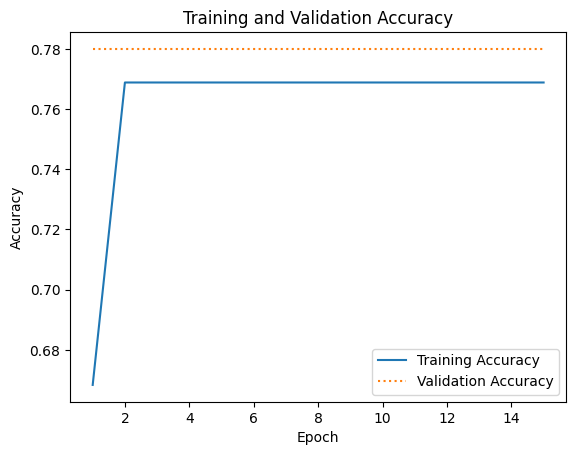

In [ ]:
import matplotlib.pyplot as plt

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

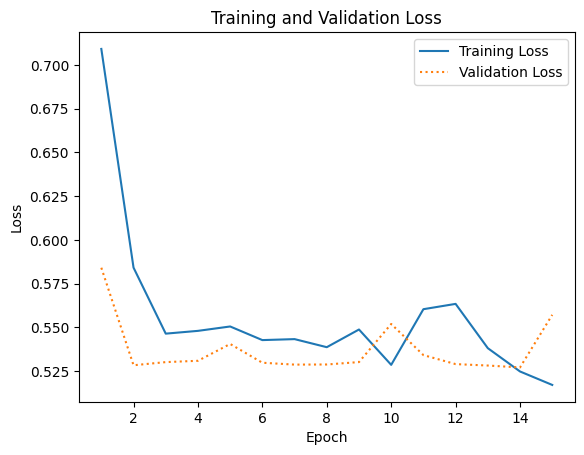

In [ ]:
plt.plot(epochs, loss, '-', label='Training Loss')
plt.plot(epochs, val_loss, ':', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

8/8 [==============================] - 1s 88ms/step
Test Accuracy: 0.8590
               precision    recall  f1-score   support

non_depressed       0.86      1.00      0.92       201
    depressed       0.00      0.00      0.00        33

     accuracy                           0.86       234
    macro avg       0.43      0.50      0.46       234
 weighted avg       0.74      0.86      0.79       234



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


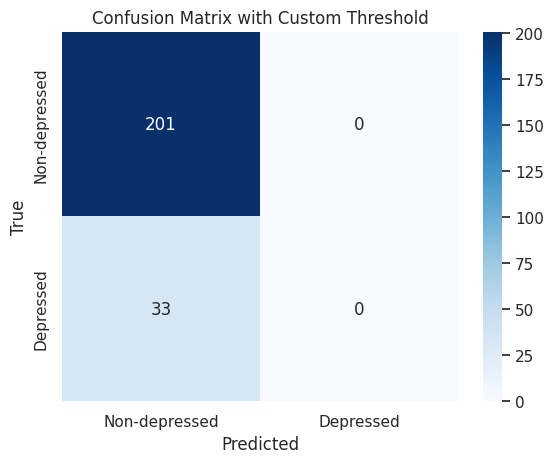

In [ ]:
from sklearn.metrics import f1_score, classification_report, accuracy_score, confusion_matrix
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt


y_predicted = model.predict(x_test_norm)

accuracy = accuracy_score(y_test_encoded.argmax(axis=1), y_predicted.argmax(axis=1))
print(f'Test Accuracy: {accuracy:.4f}')
print(classification_report(y_test_encoded.argmax(axis=1), y_predicted.argmax(axis=1), target_names=class_labels))

mat = confusion_matrix(y_test_encoded.argmax(axis=1), y_predicted.argmax(axis=1))


sns.heatmap(mat, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-depressed", "Depressed"], yticklabels=["Non-depressed", "Depressed"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix with Custom Threshold")
plt.show()


## Use transfer learning to improve accuracy

[Transfer learning](https://towardsdatascience.com/a-comprehensive-hands-on-guide-to-transfer-learning-with-real-world-applications-in-deep-learning-212bf3b2f27a) is a powerful technique that allows sophisticated CNNs trained by Google, Microsoft, and others on GPUs to be repurposed and used to solve domain-specific problems. Many pretrained CNNs are available in the public domain, and several are included with Keras. Let's use [`MobileNetV2`](https://keras.io/api/applications/mobilenet/), a pretrained CNN from Google that is optimized for mobile devices, to extract features from spectrogram images.

> `MobileNetV2` requires less processing power and has a smaller memory footprint than CNNs such as `ResNet50V2`. That's why it is ideal for mobile devices. You can learn more about it in the [Google AI blog](https://ai.googleblog.com/2018/04/mobilenetv2-next-generation-of-on.html).

Start by calling Keras's [MobileNetV2](https://keras.io/api/applications/mobilenet/) function to instantiate `MobileNetV2` without the classification layers. Use the [preprocess_input](https://www.tensorflow.org/api_docs/python/tf/keras/applications/mobilenet/preprocess_input) function for `MobileNet` networks to preprocess the training and testing images. Then run both datasets through `MobileNetV2` to extract features.

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet import preprocess_input

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x_train_norm = preprocess_input(np.array(x_train))
x_test_norm = preprocess_input(np.array(test_images))
x_eval_norm = preprocess_input(np.array(x_eval))


train_features = base_model.predict(x_train_norm)
test_features = base_model.predict(x_test_norm)
eval_features = base_model.predict(x_eval_norm)


2/2 [==============================] - 1s 780ms/step


In [ ]:
model = Sequential()
model.add(Flatten(input_shape=train_features.shape[1:]))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hist = model.fit(train_features, y_train_encoded, validation_data=(eval_features, y_eval_encoded), batch_size=32, epochs=15)


Epoch 1/15
7/7 [==============================] - 1s 40ms/step - loss: 13.5160 - accuracy: 0.6533 - val_loss: 4.6508 - val_accuracy: 0.7000
Epoch 2/15
7/7 [==============================] - 0s 13ms/step - loss: 2.0946 - accuracy: 0.7839 - val_loss: 3.8637 - val_accuracy: 0.7800
Epoch 3/15
7/7 [==============================] - 0s 15ms/step - loss: 1.1134 - accuracy: 0.8191 - val_loss: 2.1936 - val_accuracy: 0.6200
Epoch 4/15
7/7 [==============================] - 0s 12ms/step - loss: 0.2943 - accuracy: 0.9246 - val_loss: 5.5595 - val_accuracy: 0.8000
Epoch 5/15
7/7 [==============================] - 0s 14ms/step - loss: 0.7807 - accuracy: 0.9045 - val_loss: 1.9935 - val_accuracy: 0.6400
Epoch 6/15
7/7 [==============================] - 0s 13ms/step - loss: 0.5260 - accuracy: 0.9447 - val_loss: 2.0712 - val_accuracy: 0.6800
Epoch 7/15
7/7 [==============================] - 0s 13ms/step - loss: 0.1358 - accuracy: 0.9698 - val_loss: 3.1011 - val_accuracy: 0.8000
Epoch 8/15
7/7 [==========

[]

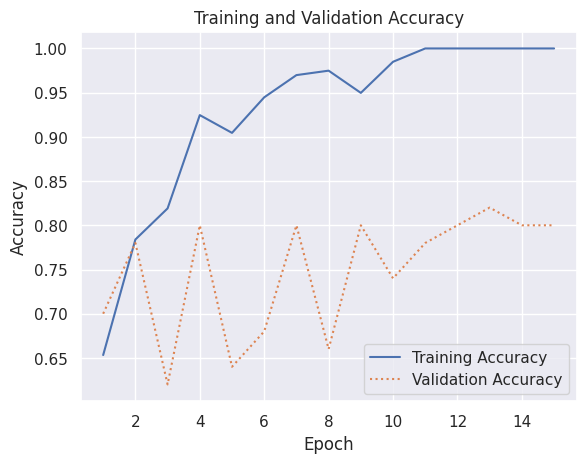

In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

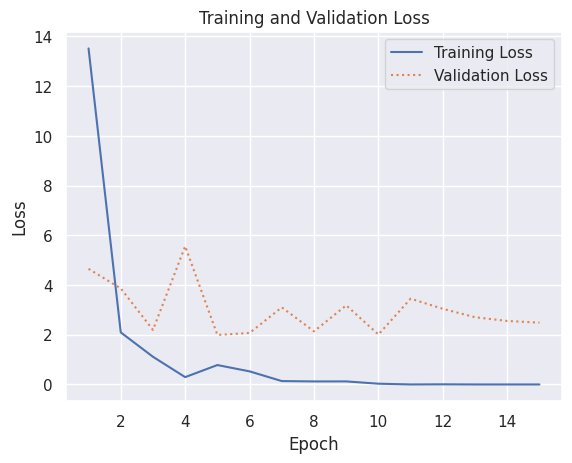

In [ ]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']
plt.plot(epochs, loss, '-', label='Training Loss')
plt.plot(epochs, val_loss, ':', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

8/8 [==============================] - 0s 4ms/step
Test Accuracy: 0.7479
               precision    recall  f1-score   support

non_depressed       0.85      0.85      0.85       201
    depressed       0.12      0.12      0.12        33

     accuracy                           0.75       234
    macro avg       0.49      0.49      0.49       234
 weighted avg       0.75      0.75      0.75       234



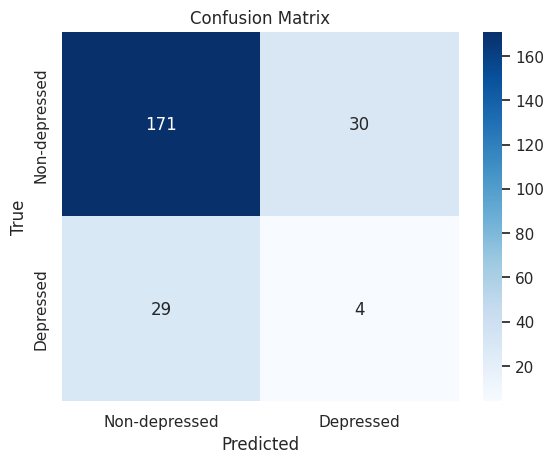

In [ ]:
from sklearn.metrics import f1_score, classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_predicted2 = model.predict(test_features)
# Assuming y_test_encoded and y_predicted are defined
# If not, make sure to define them appropriately before running this code
accuracy2 = accuracy_score(y_test_encoded.argmax(axis=1), y_predicted2.argmax(axis=1))
print(f'Test Accuracy: {accuracy2:.4f}')
print(classification_report(y_test_encoded.argmax(axis=1), y_predicted2.argmax(axis=1), target_names=class_labels))

# Generate confusion matrix
mat2 = confusion_matrix(y_test_encoded.argmax(axis=1), y_predicted2.argmax(axis=1))

# Plot confusion matrix using seaborn
sns.heatmap(mat2, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-depressed", "Depressed"], yticklabels=["Non-depressed", "Depressed"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# plt.figure(figsize=(8, 6))
# sns.heatmap(confusion3, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-depressed", "Depressed"], yticklabels=["Non-depressed", "Depressed"])
# plt.xlabel("Predicted")
# plt.ylabel("True")
# plt.title("Confusion Matrix with Custom Threshold")
# plt.show()

# Generate classification report

# accuracy = accuracy_score(y_test_encoded, y_predicted)
# print(f"Test Accuracy with Custom Threshold: {accuracy}")

# # Generate classification report
# report = classification_report(y_test_encoded, y_predicted)
# print("Classification Report with Custom Threshold:\n", report)

# # Calculate and print the confusion matrix
# confusion = confusion_matrix(y_test_encoded, y_predicted)
# print("Confusion Matrix with Custom Threshold:")
# print(confusion)

# # Plot the confusion matrix (optional)
# plt.figure(figsize=(8, 6))
# sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-depressed", "Depressed"], yticklabels=["Non-depressed", "Depressed"])
# plt.xlabel("Predicted")
# plt.ylabel("True")
# plt.title("Confusion Matrix with Custom Threshold")
# plt.show()